### CruiseMaps with Data

In [8]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import cmocean

#using xarray for bathymetry data read
import xarray as xa
import pandas as pd

extent=[-179.5, -145, 50, 74]

server_url = 'https://coastwatch.pfeg.noaa.gov/erddap/griddap/usgsCeSS111'
bathy = xa.open_dataset(server_url) 
bathy_sub = bathy.sel(latitude=slice(extent[3],extent[2]),longitude=slice(extent[0],extent[1])).load()

#bathy_sub.topo.plot(cmap=cmocean.cm.gray)

In [2]:
def make_map(projection=ccrs.PlateCarree()):
    fig, ax = plt.subplots(figsize=(12,12),
                           subplot_kw=dict(projection=projection))
    if projection == ccrs.PlateCarree():
        gl = ax.gridlines(draw_labels=True)
        gl.xlabels_top = gl.ylabels_right = False
        gl.xformatter = LONGITUDE_FORMATTER
        gl.yformatter = LATITUDE_FORMATTER
    return fig, ax

In [3]:
path = '/Users/bell/ecoraid/2021/CTDcasts/dy2103/working/'
data = pd.read_csv(path + 'dy2103_bottomtemp.csv')
loc = pd.read_csv(path + 'dy2103_ctd_stations.csv',header=None,names=[0,'latitude','longitude'],index_col=0)

#loc['latitude'] = loc['lat']+loc['latdm']/60
#loc['longitude'] = -1 * loc['lon']+loc['londm']/60

In [4]:
data.sample()

,Pressure [dbar],c0mS/cm,c1mS/cm,flECO-AFL,sbeox0V,t090C,t190C,timeS,sbeox1V,par,...,sigma-t00,sigma-t11,sbeox0ML/L,sbox0Mm/Kg,sbeox0PS,sbeox1ML/L,sbox1Mm/Kg,sbeox1PS,nbin,flag
ctd053,77.0,26.839671,26.840744,0.1549,1.9813,-0.4109,-0.4106,202.382,2.2917,0.20107,...,26.0926,26.0935,7.7418,336.957,93.939,7.6241,331.833,92.511,37.0,False


In [5]:
loc.sample()

,latitude,longitude
0,,
ctd010,56.861167,165.120833


In [6]:
df = pd.concat((data,loc),axis=1)
df

,Pressure [dbar],c0mS/cm,c1mS/cm,flECO-AFL,sbeox0V,t090C,t190C,timeS,sbeox1V,par,...,sbeox0ML/L,sbox0Mm/Kg,sbeox0PS,sbeox1ML/L,sbox1Mm/Kg,sbeox1PS,nbin,flag,latitude,longitude
ctd001,83.0,30.430823,30.430121,0.7077,2.0632,4.5400,4.5406,329.529,2.3795,0.20097,...,7.1005,309.289,97.250,6.9732,303.746,95.508,37.0,False,54.520833,165.172167
ctd002,65.0,29.065309,29.066116,1.4145,2.0880,2.5927,2.5926,242.119,2.4117,0.20107,...,7.6147,331.555,99.627,7.4461,324.211,97.421,17.0,False,56.943000,163.837833
ctd003,65.0,28.840694,28.841969,1.4223,2.0785,2.3476,2.3479,245.880,2.3986,0.20105,...,7.6219,331.868,99.091,7.4608,324.856,96.999,19.0,False,57.015000,164.216167
ctd004,71.0,28.768210,28.769279,0.6112,2.0586,2.2796,2.2800,187.327,2.3795,0.20101,...,7.5411,328.353,97.857,7.4058,322.462,96.103,35.0,False,56.767833,164.330833
ctd005,71.0,29.158539,29.159694,0.6789,2.0573,2.7664,2.7666,183.879,2.3748,0.20105,...,7.4328,323.656,97.628,7.2904,317.451,95.757,41.0,False,56.666167,163.859333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ctd084,153.0,31.197072,31.196722,0.6592,1.9023,4.4539,4.4501,366.918,2.2016,0.20131,...,6.4218,279.523,88.329,6.3650,277.047,87.542,3.0,False,54.435167,165.273167
ctd085,132.0,31.219309,31.220824,0.9714,1.9278,4.5211,4.5215,316.533,2.2280,0.20109,...,6.5068,283.230,89.625,6.4414,280.381,88.725,21.0,False,54.423333,165.145833
ctd086,42.0,30.837797,30.840859,2.3187,2.0932,4.9279,4.9256,140.407,2.4402,0.20106,...,7.1113,309.748,98.388,7.0374,306.526,97.364,30.0,False,54.450333,164.996500
ctd087,156.0,31.193294,31.194622,0.6273,1.9020,4.4475,4.4477,409.656,2.2009,0.20322,...,6.4186,279.382,88.272,6.3711,277.315,87.620,53.0,False,54.393667,165.279000


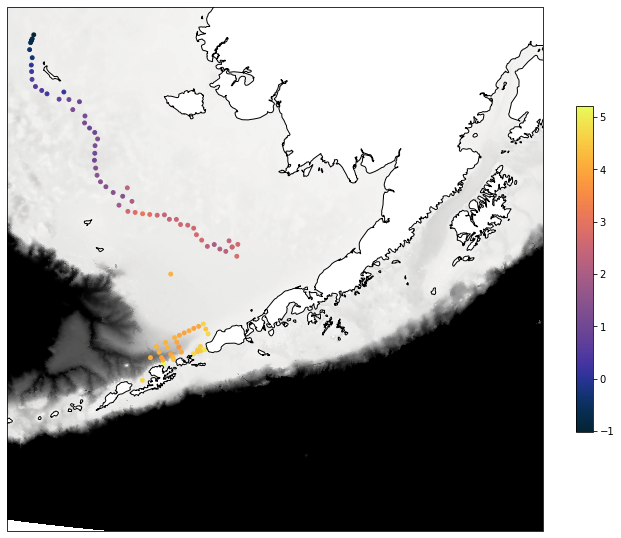

In [14]:
projection=ccrs.LambertConformal(central_longitude=-160.0)
transformation=ccrs.PlateCarree()

land_50m = cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                                edgecolor='face',
                                                facecolor='1.0')

fig,ax = make_map(projection=projection)

ax.pcolormesh(bathy_sub.longitude, bathy_sub.latitude, 
              bathy_sub.topo, cmap=cmocean.cm.gray,
              vmin=-3000,vmax=100,
              transform=transformation)

c = ax.scatter(-1*df.longitude, df.latitude, s=15,
                               c=df.t090C, cmap=cmocean.cm.thermal,
                               transform=transformation)
plt.colorbar(c,shrink=.5)
ax.add_feature(land_50m)
ax.coastlines(resolution='10m')

extent=[-172, -152, 50, 62]
ax.set_extent(extent)
        

fig.savefig('DY2103_BTMTemp_Full.png',dpi=300)